In [128]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [8]:
image_matrix = imread("cat.jpg").astype(float)

In [12]:
def plot_diff(X, X_changed, title):
    if X.dtype != np.uint8 or X_changed.dtype != np.uint8:
        X = X / 255.0
        X_changed = X_changed / 255.0

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(X)
    ax[0].axis('off')
    ax[0].set_title("Before changes")

    ax[1].imshow(X_changed)
    ax[1].axis('off')
    ax[1].set_title("After changes")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [50]:
def stretch(X, a, b):
    X_cp = X.copy()
    rows, cols = X_cp.shape[:2]

    new_rows, new_cols = int(rows * b), int(cols * a)
    stretched = np.zeros((new_rows, new_cols, 3), dtype=X_cp.dtype)

    transformation = np.array([[a, 0], [0,b]])
    transformation_inv = np.linalg.inv(transformation)

    for i in range(new_rows):
        for j in range(new_cols):
            j_old, i_old = transformation_inv.dot(np.array([j, i]))
            j_old, i_old = int(round(j_old)), int(round(i_old))
            stretched[i, j] = X_cp[i_old, j_old] if 0 <= j_old < cols and 0 <= i_old < rows else 0

    return plot_diff(X, stretched, "Stretched image")

In [10]:
def shear(X, a, b):
    h, w, c = X.shape
    y, x = np.indices((h, w))
    coords = np.vstack((x.ravel(), y.ravel()))
    transformation = np.array([[1, a ], [b,1]])
    new_coords = transformation @ coords

    min_x, min_y = new_coords.min(axis=1)
    new_coords[0] -= min_x
    new_coords[1] -= min_y

    max_x, max_y = new_coords.max(axis=1)
    new_w = int(np.ceil(max_x)) + 1
    new_h = int(np.ceil(max_y)) + 1

    sheared = np.zeros((new_h, new_w, c), dtype=X.dtype)

    new_x = np.round(new_coords[0]).astype(int)
    new_y = np.round(new_coords[1]).astype(int)
    mask = (new_x >= 0) & (new_x < new_w) & (new_y >= 0) & (new_y < new_h)

    for ch in range(c):
        channel = X[..., ch].ravel()
        sheared[new_y[mask], new_x[mask], ch] = channel[mask]

    return plot_diff(X, sheared, "Sheared image")

In [52]:
def reflection(X, a, b):
    X_cp = X.copy()
    rows, cols = X_cp.shape[:2]

    new_rows, new_cols = int(rows * b), int(cols * a)
    reflected = np.zeros((new_rows, new_cols, 3), dtype=X_cp.dtype)

    denominator = (a ** 2 + b ** 2)
    transformation = (1/denominator)*np.array([[a**2 - b**2, 2*a*b],[2*a*b, b**2 - a**2]])
    transformation_inv = np.linalg.inv(transformation)
    for i in range(new_rows):
        for j in range(new_cols):
            j_old, i_old = transformation_inv.dot(np.array([j, i]))
            j_old, i_old = int(round(j_old)), int(round(i_old))
            reflected[i, j] = X_cp[i_old, j_old] if 0 <= j_old < cols and 0 <= i_old < rows else 0

    return plot_diff(X, reflected, "Reflected image")

In [53]:
def rotation(X,theta):
    X_cp = X.copy()
    rows, cols = X_cp.shape[:2]
    rotated = np.zeros((rows, cols, 3), dtype=X_cp.dtype)
    cx, cy = cols / 2, rows / 2

    transformation = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    transformation_inv = np.linalg.inv(transformation)
    for i in range(rows):
        for j in range(cols):
            xshift, yshift = j - cx, i - cy
            j_old, i_old = transformation_inv.dot(np.array([xshift, yshift]))
            j_old, i_old = int(round(j_old)), int(round(i_old))
            rotated[i, j] = X_cp[i_old, j_old] if (0 <= j_old < cols and 0 <= i_old < rows) else 0
    return plot_diff(X, rotated, "Rotated image")

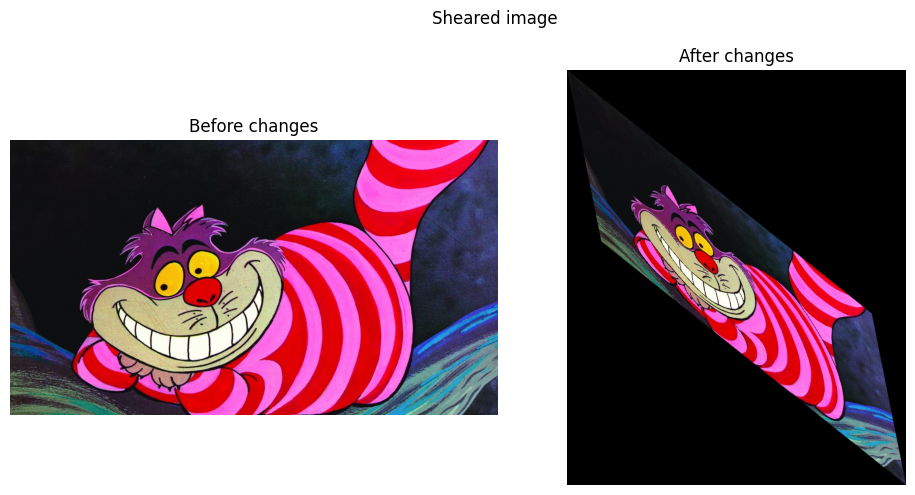

In [15]:
shear(image_matrix, 0.2,0.8)